In [1]:
import pandas as pd
housing = pd.read_csv("housing.csv")

In [2]:
#housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe() #all null values ignored

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

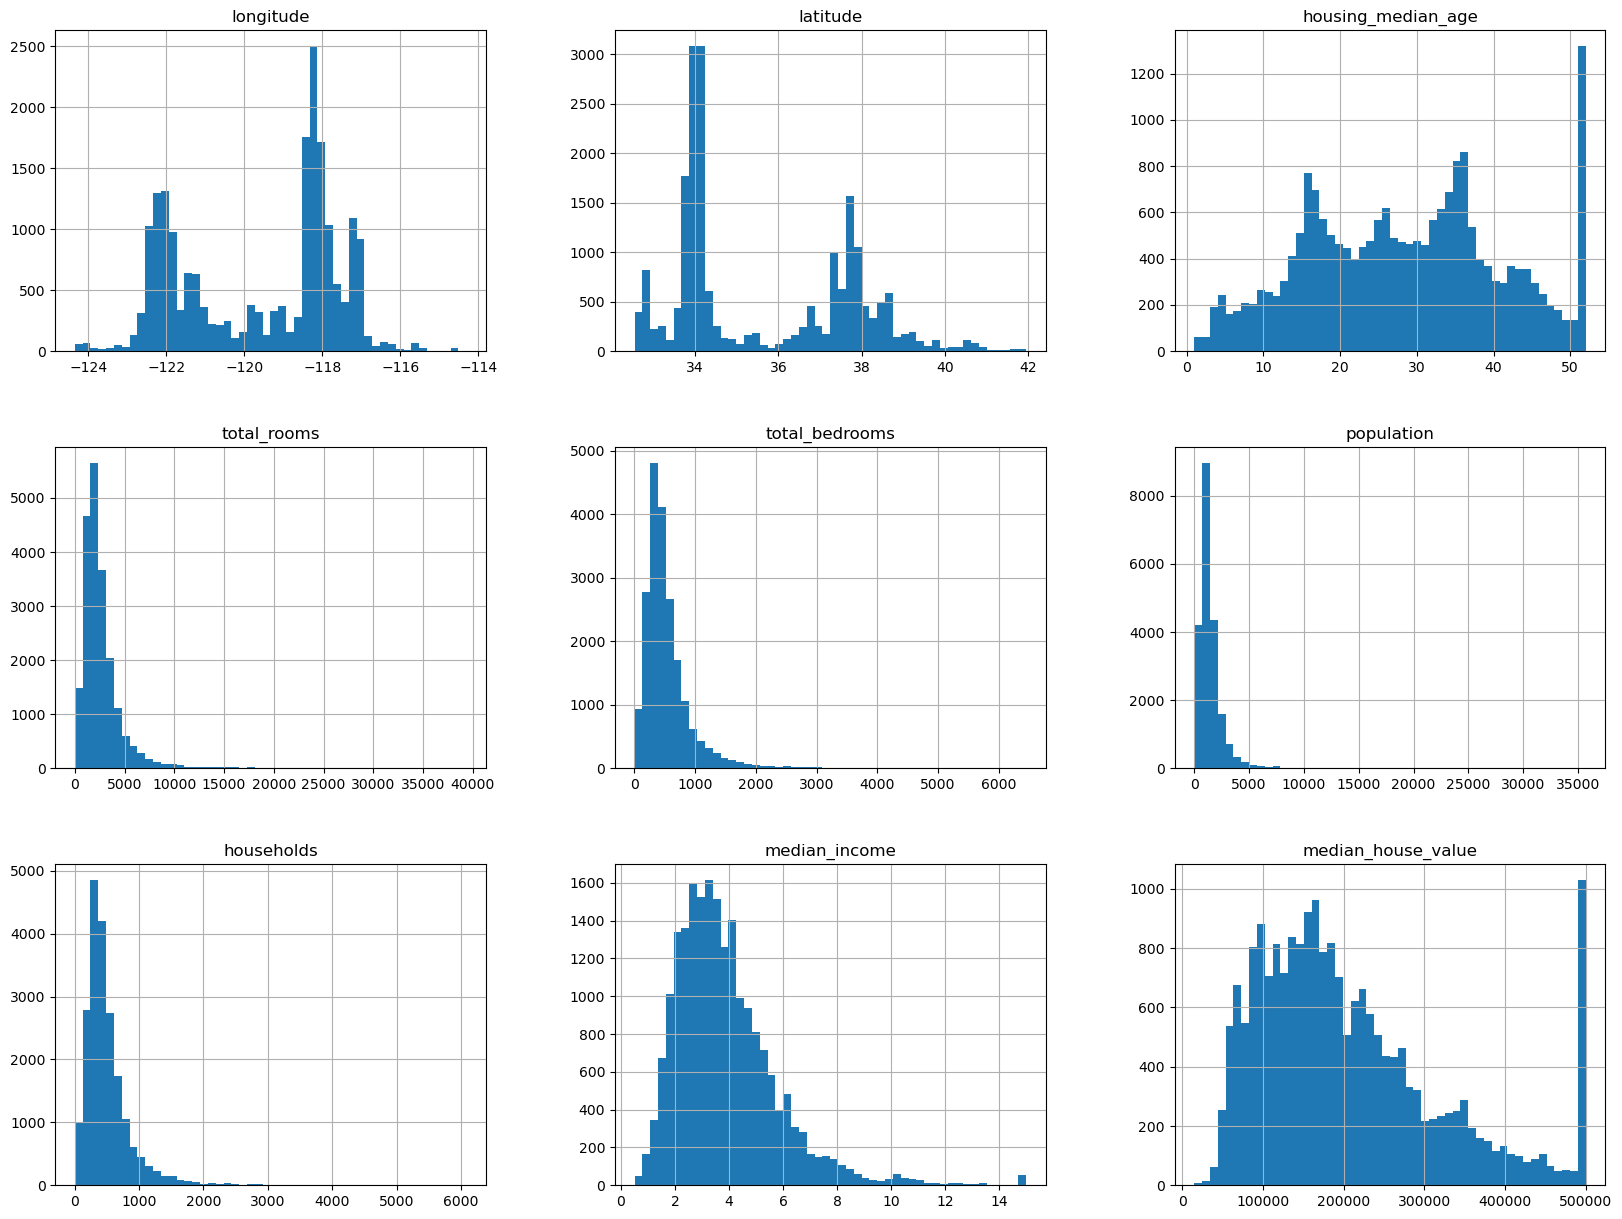

In [6]:
#creating plots on dataset
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [7]:
"""
Creating shuffled testset with constant values in training and updated dataset values going to 
test set in case dataset is updated, this done via hashlib
"""
import hashlib
import numpy as np

def test_set_check(identifier,test_ratio,hash):
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio
    
def split_train_test(data,test_ratio,id_column,hash=hashlib.md5):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_:test_set_check(id_,test_ratio,hash))
    return data.loc[~in_test_set],data.loc[in_test_set]

<Axes: >

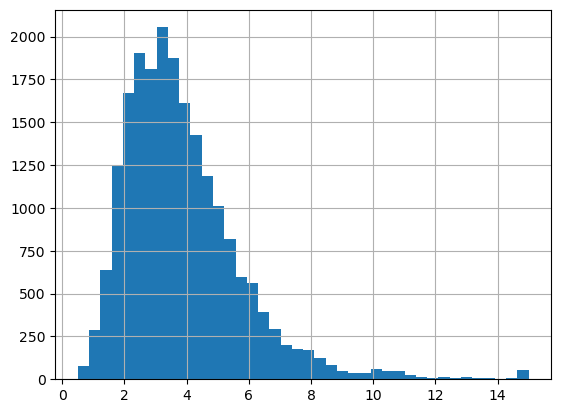

In [8]:
#understanding stratification
housing["median_income"].hist(bins=40)

In [9]:
#creating hosusing income categories
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"]=housing["income_cat"].apply(lambda x: 5 if x>5 else x)

<Axes: >

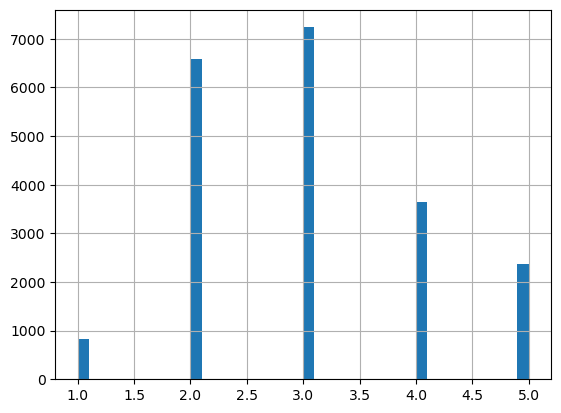

In [10]:
housing["income_cat"].hist(bins=40)

In [11]:
#startified split
from sklearn.model_selection import StratifiedShuffleSplit

split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_idx,test_idx in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_idx]
    strat_test_set=housing.loc[test_idx]

In [12]:
#dropping income category from test and train splits
a= (strat_train_set,strat_test_set)

In [13]:
for i in a:
    i.drop(["income_cat"],axis=1,inplace=True)

In [14]:
data =strat_test_set.copy()
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5241     -118.39     34.12                29.0       6447.0          1012.0   
17352    -120.42     34.89                24.0       2020.0           307.0   
3505     -118.45     34.25                36.0       1453.0           270.0   
7777     -118.10     33.91                35.0       1653.0           325.0   
14155    -117.07     32.77                38.0       3779.0           614.0   

       population  households  median_income  median_house_value  \
5241       2184.0       960.0         8.2816            500001.0   
17352       855.0       283.0         5.0099            162500.0   
3505        808.0       275.0         4.3839            204600.0   
7777       1072.0       301.0         3.2708            159700.0   
14155      1495.0       614.0         4.3529            184000.0   

      ocean_proximity  
5241        <1H OCEAN  
17352       <1H OCEAN  
3505        <1H OCEAN  
7777        <1H OCEAN  
14155      NEAR OCEAN

<Axes: xlabel='longitude', ylabel='latitude'>

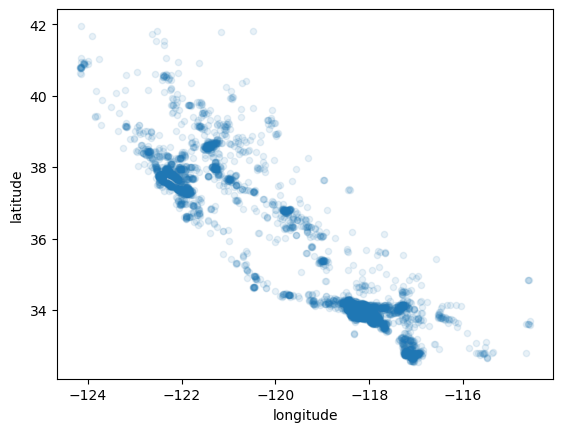

In [15]:
# since there are latitude and longitudes, i am adding a scatter plot
#set alpha =0.1 to clearly see dense points
data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

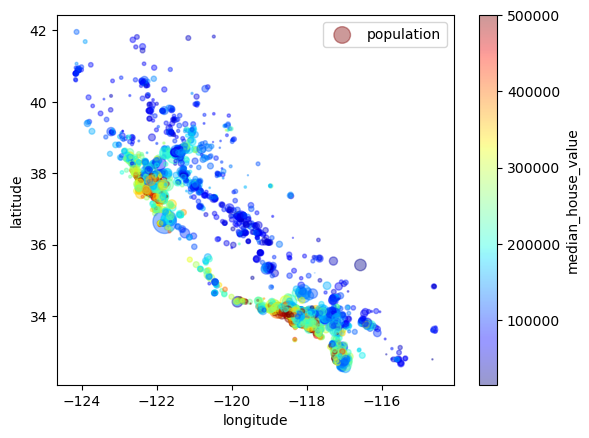

In [16]:
#advanced scatter plot using median value of house
data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
         s=data["population"]/100,label="population",
         c="median_house_value",cmap=plt.get_cmap("jet"),
         colorbar=True)
plt.legend()

In [17]:
# Calculate pearson's r coefficient
corr_matrix=data.corr()
corr_matrix

C:\Users\milon\AppData\Local\Temp\ipykernel_16556\383832959.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()


longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925426           -0.117560     0.028628   
latitude            -0.925426  1.000000            0.032850    -0.024331   
housing_median_age  -0.117560  0.032850            1.000000    -0.350487   
total_rooms          0.028628 -0.024331           -0.350487     1.000000   
total_bedrooms       0.043930 -0.046573           -0.304722     0.933630   
population           0.068887 -0.084358           -0.287470     0.864091   
households           0.026334 -0.045920           -0.290560     0.918768   
median_income        0.002910 -0.099023           -0.150288     0.191623   
median_house_value  -0.039848 -0.150336            0.071210     0.131296   

                    total_bedrooms  population  households  median_income  \
longitude                 0.043930    0.068887    0.026334       0.002910   
latitude                 -0.046573   -0.084358   -0.045920      -0.099023   
housing_median_age       -0.304722   -0.287470   -0.290560      -0.150288   
total_rooms               0.933630    0.864091    0.918768       0.191623   
total_bedrooms            1.000000    0.882700    0.978303      -0.000252   
population                0.882700    1.000000    0.916104       0.014239   
households                0.978303    0.916104    1.000000       0.021517   
median_income            -0.000252    0.014239    0.021517       1.000000   
median_house_value        0.057247   -0.016164    0.070947       0.691867   

                    median_house_value  
longitude                    -0.039848  
latitude                     -0.150336  
housing_median_age            0.071210  
total_rooms                   0.131296  
total_bedrooms                0.057247  
population                   -0.016164  
households                    0.070947  
median_income                 0.691867  
median_house_value            1.000000

In [18]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691867
total_rooms           0.131296
housing_median_age    0.071210
households            0.070947
total_bedrooms        0.057247
population           -0.016164
longitude            -0.039848
latitude             -0.150336
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

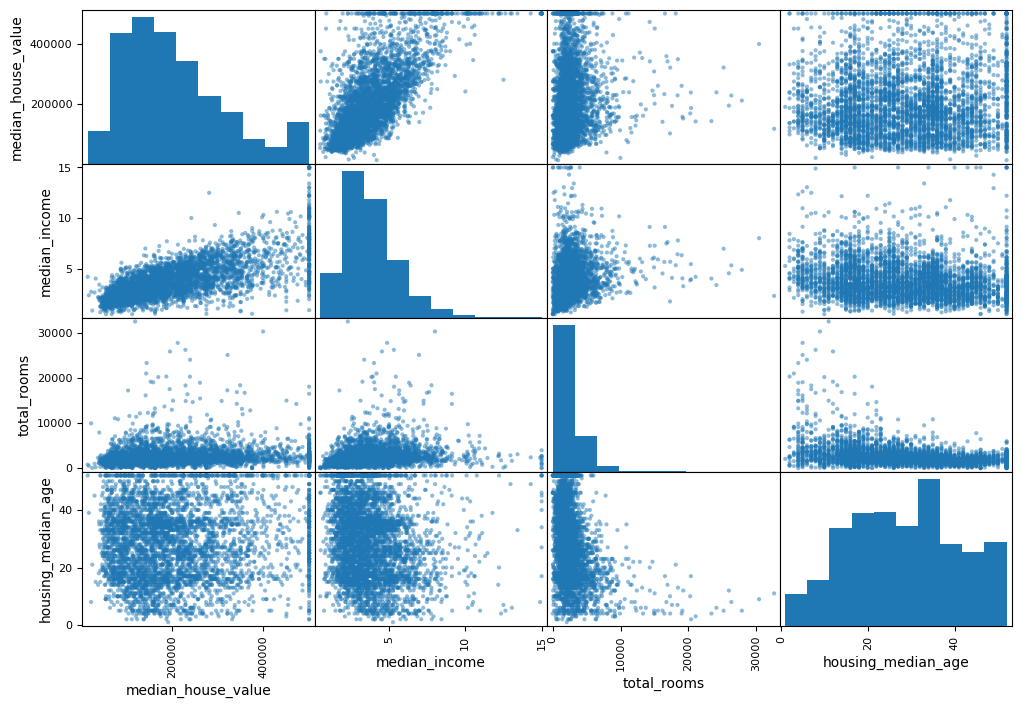

In [19]:
#scatter matrix fom pandas

from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(data[attributes],figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

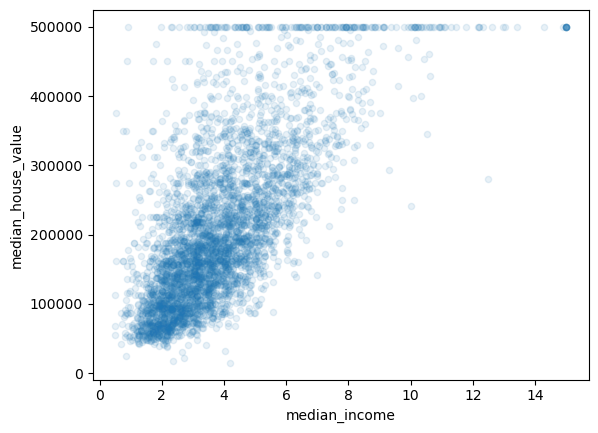

In [20]:
#exploring more on median income
data.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [21]:
data["rooms_per_household"]=data["total_rooms"]/data["households"]
data["bedrooms_per_room"]=data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"]=data["population"]/data["households"]

In [22]:
#lets check co-relation matrix again
corr_matrix=data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\milon\AppData\Local\Temp\ipykernel_16556\3227705503.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()


median_house_value          1.000000
median_income               0.691867
rooms_per_household         0.192731
total_rooms                 0.131296
housing_median_age          0.071210
households                  0.070947
total_bedrooms              0.057247
population                 -0.016164
longitude                  -0.039848
population_per_household   -0.134999
latitude                   -0.150336
bedrooms_per_room          -0.240481
Name: median_house_value, dtype: float64

In [23]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [24]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [25]:
housing_num=housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [26]:
# view these values
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [27]:
X=imputer.transform(housing_num)

In [28]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns)

In [29]:
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
housing_cat=housing["ocean_proximity"]
housing_cat_encoded=encoder.fit_transform(housing_cat)
housing_cat_encoded

array([1, 4, 1, ..., 0, 0, 1])

In [31]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [33]:
#converting the sparse matrix to array
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [34]:
from sklearn.base import BaseEstimator,TransformerMixin

rooms_ix,bedrooms_ix,population_ix,household_ix=3,4,5,6

class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,household_ix]
        population_per_household=X[:,population_ix]/X[:,household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

In [35]:
#lets instantiate our object
adder= FeatureAdder(add_bedrooms_per_room=False)
housing_extra_features =adder.fit_transform(housing.values)

In [36]:
from sklearn.preprocessing import FunctionTransformer

rooms_ix,bedrooms_ix,population_ix,household_ix=3,4,5,6

def extra_features(X,add_bedrooms_per_room=True):
    rooms_per_household=X[:,rooms_ix]/X[:,household_ix]
    population_per_household=X[:,population_ix]/X[:,household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

In [37]:
feature_adder =FunctionTransformer(extra_features,validate=False,
                                  kw_args={"add_bedrooms_per_room":False})
housing_extra_features =feature_adder.fit_transform(housing.values)

housing_extra_feat = pd.DataFrame(
    housing_extra_features,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_feat.head()

longitude latitude housing_median_age total_rooms total_bedrooms  \
12655   -121.46    38.52               29.0      3873.0          797.0   
15502   -117.23    33.09                7.0      5320.0          855.0   
2908    -119.04    35.37               44.0      1618.0          310.0   
14053   -117.13    32.75               24.0      1877.0          519.0   
20496    -118.7    34.28               27.0      3536.0          646.0   

      population households median_income ocean_proximity rooms_per_household  \
12655     2237.0      706.0        2.1736          INLAND            5.485836   
15502     2015.0      768.0        6.3373      NEAR OCEAN            6.927083   
2908       667.0      300.0         2.875          INLAND            5.393333   
14053      898.0      483.0        2.2264      NEAR OCEAN            3.886128   
20496     1837.0      580.0        4.4964       <1H OCEAN            6.096552   

      population_per_household  
12655                 3.168555  
15502                 2.623698  
2908                  2.223333  
14053                 1.859213  
20496                 3.167241

In [38]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.compose import ColumnTransformer

num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]

num_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("feature_adder",FeatureAdder()),
    ("std_scaler",StandardScaler()),
])

full_pipeline=ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [39]:
housing_prepared = full_pipeline.fit_transform(housing)

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [41]:
some_data=housing.iloc[:5]
some_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income ocean_proximity  
12655      2237.0       706.0         2.1736          INLAND  
15502      2015.0       768.0         6.3373      NEAR OCEAN  
2908        667.0       300.0         2.8750          INLAND  
14053       898.0       483.0         2.2264      NEAR OCEAN  
20496      1837.0       580.0         4.4964       <1H OCEAN

In [42]:
housing_labels.iloc[:5]

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [43]:
some_prepared_data = full_pipeline.transform(some_data)

In [44]:
lin_reg.predict(some_prepared_data)

array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])

In [45]:
#calculate mean squared error
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse= mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [46]:
#another model

from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [47]:
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse= mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [48]:
# using cross_val_score

from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [49]:
rmse_scores

array([71235.95402974, 68964.2595617 , 68198.53750743, 71040.32189445,
       70254.79146365, 76978.33860082, 71256.08387162, 73465.0933739 ,
       67338.63083568, 71821.84480247])

In [50]:
#lets view all scores
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())

display_scores(rmse_scores)

Scores: [71235.95402974 68964.2595617  68198.53750743 71040.32189445
 70254.79146365 76978.33860082 71256.08387162 73465.0933739
 67338.63083568 71821.84480247]
Mean: 71055.38559414628
Standard Deviation: 2617.9809255455225


In [51]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard Deviation: 2880.328209818069


In [52]:
# try with randomforest
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
rf_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=5)
rf_rmse_scores=np.sqrt(-rf_scores)
display_scores(rf_rmse_scores)

Scores: [50336.6589558  49933.41067876 49882.98966876 51551.90444846
 51614.40117782]
Mean: 50663.87298591968
Standard Deviation: 767.1410145181261


In [53]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators':[3,10,30],'max_features':[2,4,6,8],
    'bootstrap':[False,True],'n_estimators':[3,10],'max_features':[2,3,4],
}

forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring="neg_mean_squared_error")
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [False, True], 'max_features': [2, 3, 4],
                         'n_estimators': [3, 10]},
             scoring='neg_mean_squared_error')

In [54]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [55]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10)

In [56]:
#scores
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score), params)

60716.74805773041 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54419.36243874841 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59479.955000591035 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52415.5286257323 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58513.21758651087 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51503.50065385824 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
65600.99440768112 {'bootstrap': True, 'max_features': 2, 'n_estimators': 3}
55608.709268443796 {'bootstrap': True, 'max_features': 2, 'n_estimators': 10}
60915.16537482268 {'bootstrap': True, 'max_features': 3, 'n_estimators': 3}
53582.320640222984 {'bootstrap': True, 'max_features': 3, 'n_estimators': 10}
60435.120703808534 {'bootstrap': True, 'max_features': 4, 'n_estimators': 3}
52551.53467930514 {'bootstrap': True, 'max_features': 4, 'n_estimators': 10}


In [57]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.086598      0.003097         0.003653        0.000396   
1        0.304218      0.026992         0.010307        0.000828   
2        0.120058      0.007159         0.003902        0.000801   
3        0.387781      0.003474         0.010814        0.000604   
4        0.142380      0.003357         0.003062        0.000259   
5        0.485556      0.009264         0.010510        0.000322   
6        0.055947      0.000838         0.003033        0.000609   
7        0.186445      0.005884         0.009302        0.001364   
8        0.072742      0.002647         0.002866        0.000291   
9        0.239165      0.003122         0.008165        0.000326   
10       0.092044      0.004235         0.003014        0.000586   
11       0.300692      0.004520         0.008052        0.000282   

   param_bootstrap param_max_features param_n_estimators  \
0            False                  2                  3   
1            False                  2                 10   
2            False                  3                  3   
3            False                  3                 10   
4            False                  4                  3   
5            False                  4                 10   
6             True                  2                  3   
7             True                  2                 10   
8             True                  3                  3   
9             True                  3                 10   
10            True                  4                  3   
11            True                  4                 10   

                                               params  split0_test_score  \
0   {'bootstrap': False, 'max_features': 2, 'n_est...      -3.589586e+09   
1   {'bootstrap': False, 'max_features': 2, 'n_est...      -2.954696e+09   
2   {'bootstrap': False, 'max_features': 3, 'n_est...      -3.693647e+09   
3   {'bootstrap': False, 'max_features': 3, 'n_est...      -2.726076e+09   
4   {'bootstrap': False, 'max_features': 4, 'n_est...      -3.382472e+09   
5   {'bootstrap': False, 'max_features': 4, 'n_est...      -2.595104e+09   
6   {'bootstrap': True, 'max_features': 2, 'n_esti...      -4.418391e+09   
7   {'bootstrap': True, 'max_features': 2, 'n_esti...      -3.149555e+09   
8   {'bootstrap': True, 'max_features': 3, 'n_esti...      -3.648351e+09   
9   {'bootstrap': True, 'max_features': 3, 'n_esti...      -3.045211e+09   
10  {'bootstrap': True, 'max_features': 4, 'n_esti...      -3.696103e+09   
11  {'bootstrap': True, 'max_features': 4, 'n_esti...      -2.862045e+09   

    split1_test_score  split2_test_score  split3_test_score  \
0       -3.596649e+09      -3.850857e+09      -3.715157e+09   
1       -2.938693e+09      -2.801012e+09      -3.039221e+09   
2       -3.194483e+09      -3.544796e+09      -3.576180e+09   
3       -2.606830e+09      -2.731108e+09      -2.793968e+09   
4       -3.325605e+09      -3.199438e+09      -3.651439e+09   
5       -2.594546e+09      -2.498270e+09      -2.795413e+09   
6       -3.943606e+09      -4.280338e+09      -4.468285e+09   
7       -3.030589e+09      -3.051692e+09      -3.182938e+09   
8       -3.710837e+09      -3.543691e+09      -3.798646e+09   
9       -2.819979e+09      -2.660107e+09      -2.896416e+09   
10      -3.715045e+09      -3.535061e+09      -3.580358e+09   
11      -2.645187e+09      -2.689836e+09      -2.841711e+09   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
0       -3.680368e+09    -3.686523e+09    9.522330e+07               10  
1       -3.073714e+09    -2.961467e+09    9.482124e+07                5  
2       -3.680219e+09    -3.537865e+09    1.810857e+08                8  
3       -2.878956e+09    -2.747388e+09    8.939306e+07                2  
4       -3.560029e+09    -3.423797e+09    1.625216e+08                7  
5       -2.779720e+09    -2.652611e+09    1.158006e+08                1  
6       -4.

In [58]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([9.05728854e-02, 6.98538082e-02, 3.93639314e-02, 2.79544790e-02,
       2.15479499e-02, 2.63875170e-02, 1.84991487e-02, 2.84746236e-01,
       8.00208245e-02, 1.02295716e-01, 6.21199436e-02, 9.87174934e-03,
       1.57822992e-01, 4.69951923e-05, 3.09657432e-03, 5.79924946e-03])

In [59]:
# display with feature names
extra_features=["rooms_per_hhold","population_per_hhold","bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"] # calleing transformer named "cat" from full pipeline
cat_one_hot_features = list(cat_encoder.categories_[0])
features = num_attribs + extra_features + cat_one_hot_features

In [60]:
sorted(zip(feature_importances, features), reverse=True)

[(0.2847462362640846, 'median_income'),
 (0.15782299154395957, 'INLAND'),
 (0.10229571616262301, 'population_per_hhold'),
 (0.09057288544352807, 'longitude'),
 (0.0800208244996907, 'rooms_per_hhold'),
 (0.06985380823731309, 'latitude'),
 (0.06211994357870755, 'bedrooms_per_room'),
 (0.03936393141463405, 'housing_median_age'),
 (0.02795447898926477, 'total_rooms'),
 (0.02638751696216256, 'population'),
 (0.021547949867138542, 'total_bedrooms'),
 (0.01849914872055066, 'households'),
 (0.009871749342477396, '<1H OCEAN'),
 (0.00579924946303604, 'NEAR OCEAN'),
 (0.0030965743185586403, 'NEAR BAY'),
 (4.699519227083493e-05, 'ISLAND')]

In [61]:
final_model= grid_search.best_estimator_

In [62]:
X_test= strat_test_set.drop("median_house_value",axis=1)
y_test= strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [63]:
final_predictions= final_model.predict(X_test_prepared)

In [64]:
final_mse= mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [65]:
final_rmse

50223.33944253064